# DATA PREPROCESSING

In [1]:
# Importing required packages
import numpy as np
import pandas as pd

In [2]:
# changing settings to display all columns
pd.set_option("display.max_columns", None)

In [3]:
#importing dataset
dataset_1 = pd.read_csv("../datasets/regression/boston.csv")

In [4]:
dataset_1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
# Checking the shape of the dataset
dataset_1.shape

(506, 14)

In [6]:
# Checking avalailable columns
dataset_1.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
# Obtaining summary statistics of the dataset
dataset_1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Removing null values

In [8]:
# Using the pandas isnull() function to count the null values present in each column
pd.isnull(dataset_1).sum(axis=0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
#Checking for duplicate entries
dataset_1[dataset_1.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


Removing outliers

In [10]:
# Creating an outlier removal function
def outlier(dataframe_in, col_names):
    q1 = dataframe_in[col_names].quantile(0.25)
    q3 = dataframe_in[col_names].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_fence  = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    dataframe_out = dataframe_in.loc[(dataframe_in[col_names] > lower_fence) & (dataframe_in[col_names] < upper_fence)]
    return dataframe_out

In [11]:
# Removing outliers for all numerical columns except target variable MEDV
cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

dataset_2 = dataset_1
for x in cols:
    dataset_2 = outlier(dataset_2, x)
    
dataset_2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [12]:
# Since CHAS is a categorical variable we check whether it has values other than 0 or 1
dataset_2["CHAS"].value_counts()

0    235
1     15
Name: CHAS, dtype: int64

In [13]:
#checking dtypes of entries
dataset_2.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [14]:
# resetting index of the dataset
dataset_3 = dataset_2.reset_index(drop=True)
dataset_3

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
246,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
247,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
248,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [15]:
# Final check of the dataset
dataset_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     250 non-null    float64
 1   ZN       250 non-null    float64
 2   INDUS    250 non-null    float64
 3   CHAS     250 non-null    int64  
 4   NOX      250 non-null    float64
 5   RM       250 non-null    float64
 6   AGE      250 non-null    float64
 7   DIS      250 non-null    float64
 8   RAD      250 non-null    int64  
 9   TAX      250 non-null    float64
 10  PTRATIO  250 non-null    float64
 11  B        250 non-null    float64
 12  LSTAT    250 non-null    float64
 13  MEDV     250 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 27.5 KB


In [16]:
#Saving final cleaned dataset in an object
dataset = dataset_3.copy()

# EXPLORATORY DATA ANALYSIS

In [17]:
# Importing packages
import matplotlib.pyplot as plt
import seaborn as sns

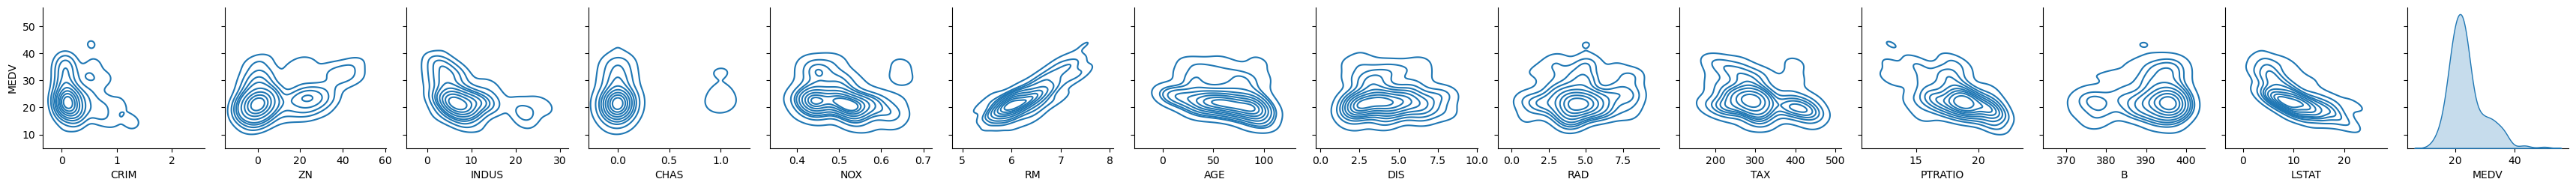

In [18]:
# Creating a pair plot
ax = sns.pairplot(dataset, y_vars = ["MEDV"], kind="kde")
plt.show()

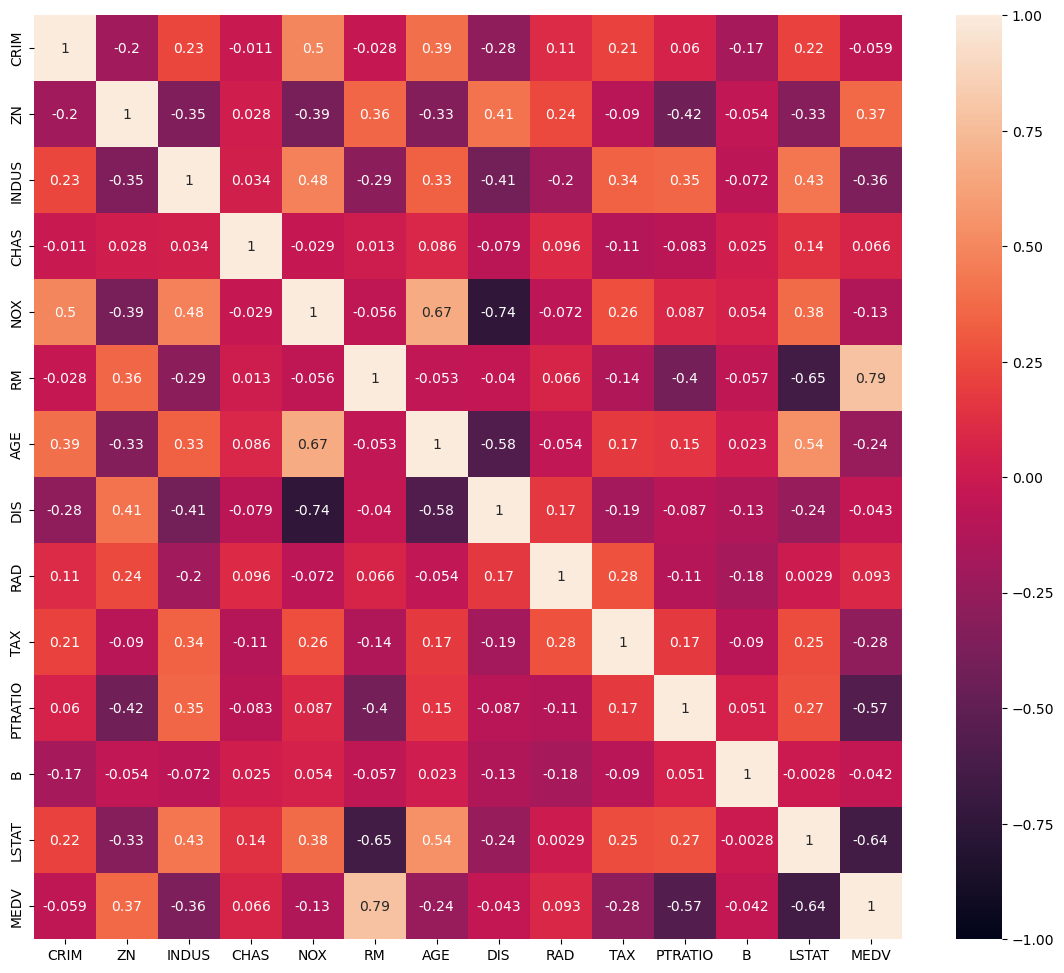

In [111]:
#Creating a correlation matrix
f, ax = plt.subplots(figsize=(14, 12))

correlation_matrix = dataset.corr('pearson')
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)

# Saving the graph
plt.savefig("Correlation matrix")

plt.show()

Since RM and MEDV have a high positive correlation we plot their association

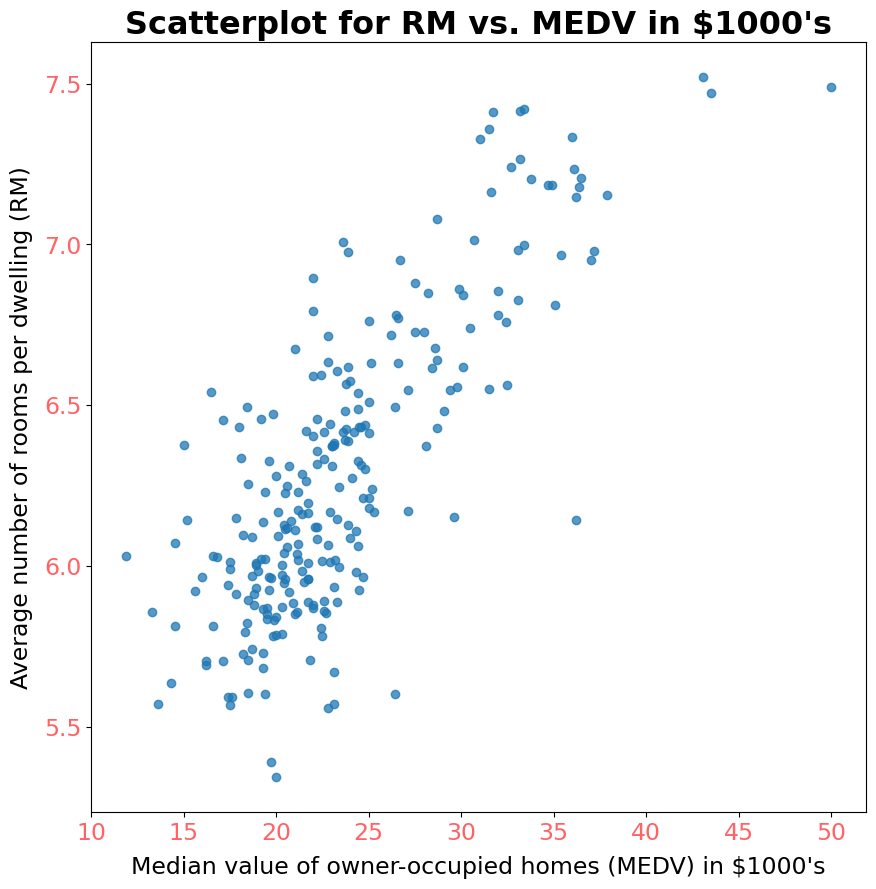

In [116]:
# Constructing a Scatterplot for Average number of rooms per dwelling (RM) Vs. Median value of owner-occupied homes in $1000's (MEDV)
fig, ax = plt.subplots(figsize = (10,10))

# Plotting the scatter plot
# opacity has been set to 0.75 so that we can identify the density of plots
ax.scatter(dataset.MEDV, dataset.RM, alpha=0.75)


# Creating the y-axis labels
ax.set_ylabel("Average number of rooms per dwelling (RM)",
                 size = 17,
                 labelpad = 8)

# Creating the x-axis labels
ax.set_xlabel("Median value of owner-occupied homes (MEDV) in $1000's",
                 size = 17,
                 labelpad = 8)

# Setting the title
ax.set_title("Scatterplot for RM vs. MEDV in $1000's",
                 size = 23,
                 weight = 'bold')

# Formatting the x and y axis tick labels
ax.tick_params(axis ='x', labelcolor ='#ff6365', labelsize = 17)
ax.tick_params(axis ='y', labelcolor ='#ff6365', labelsize = 17)

# Saving the graph
plt.savefig("Scatterplot for Average number of rooms per dwelling vs. Median value of owner-occupied homes in $1000's.png")

plt.show()

Since LSTAT and MEDV have a high negative correlation we plot their association

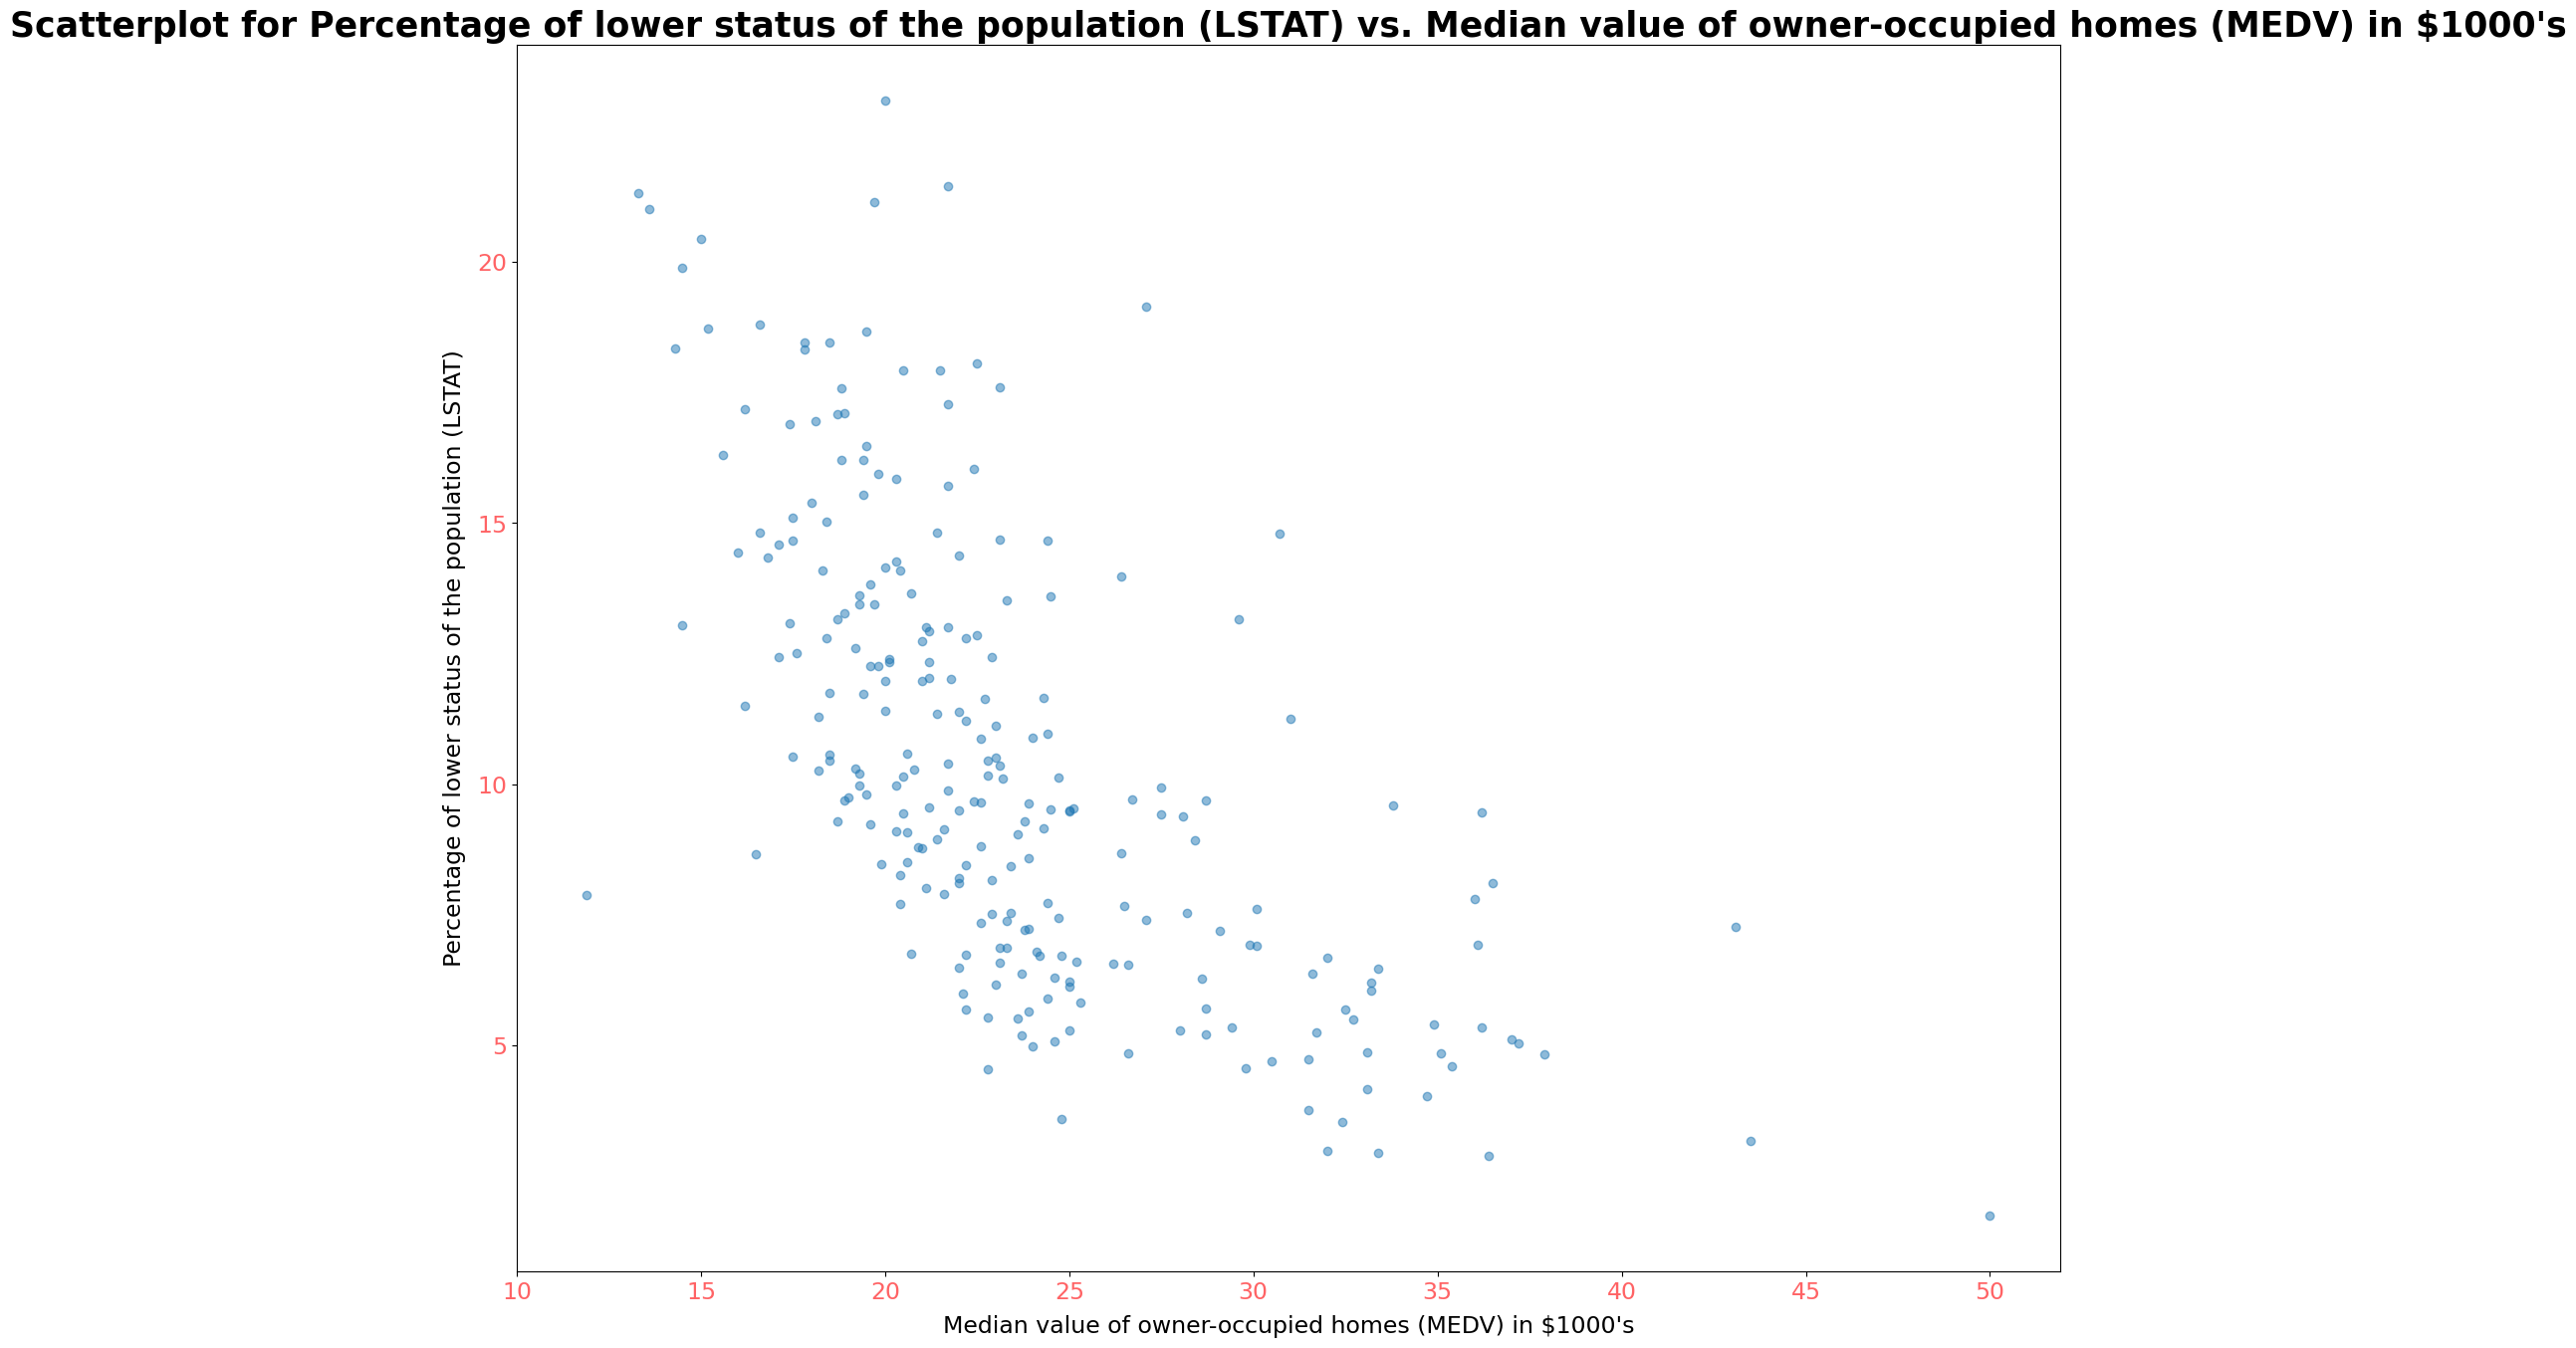

In [21]:
# Constructing a Scatterplot for Percentage of lower status of the population (LSTAT) vs. Median value of owner-occupied homes in $1000's
fig, ax = plt.subplots(figsize = (20,16))

# Plotting the scatter plot
# opacity has been set to 0.5 so that we can identify the density of plots
ax.scatter(dataset.MEDV, dataset.LSTAT, alpha=0.5)

# Creating the y-axis labels
ax.set_ylabel("Percentage of lower status of the population (LSTAT)",
                 size = 17,
                 labelpad = 8)

# Creating the x-axis labels
ax.set_xlabel("Median value of owner-occupied homes (MEDV) in $1000's",
                 size = 17,
                 labelpad = 8)

# Setting the title
ax.set_title("Scatterplot for Percentage of lower status of the population (LSTAT) vs. Median value of owner-occupied homes (MEDV) in $1000's",
                 size = 25,
                 weight = 'bold')

# Formatting the x and y axis tick labels
ax.tick_params(axis ='x', labelcolor ='#ff6365', labelsize = 17)
ax.tick_params(axis ='y', labelcolor ='#ff6365', labelsize = 17)

# Saving the graph
plt.savefig("Scatterplot for Percentage of lower status of the population (LSTAT)  vs. Median value of owner-occupied homes (MEDV) in $1000's.png")

plt.show()

Seeing how CHAS dummy variable affects the RM and LSTAT which have a significant impact on MEDV

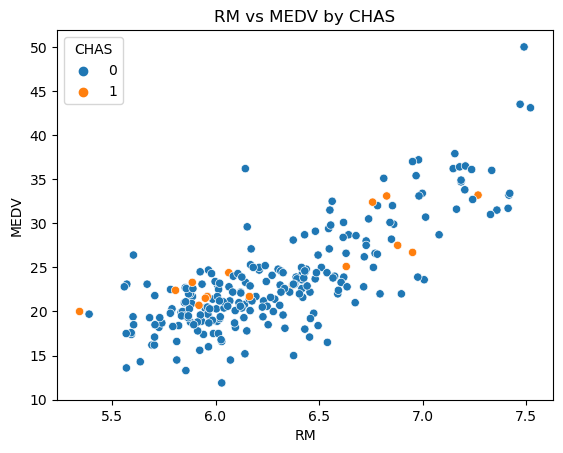

In [22]:
# Scatter plot for RM vs MEDV categorized by CHAS
sns.scatterplot(data=dataset, x='RM', y='MEDV', hue='CHAS')
plt.title("RM vs MEDV by CHAS")
plt.show()

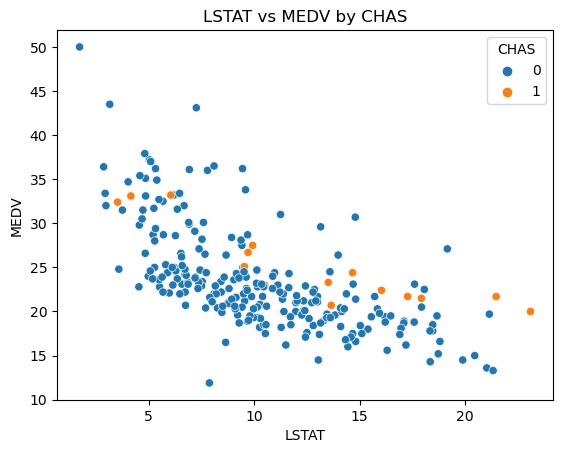

In [23]:
# Scatter plot for LSTAT vs MEDV categorized by CHAS
sns.scatterplot(data=dataset, x='LSTAT', y='MEDV', hue='CHAS')
plt.title("LSTAT vs MEDV by CHAS")
plt.show()

It can be seen that there are only a very sparse number of houses which are situated close to the Charles river.
There are only 2 houses near the Charles river where LSTAT is greater than 20%. Meaning being situated closer to the river is considered a luxury in the Boston market

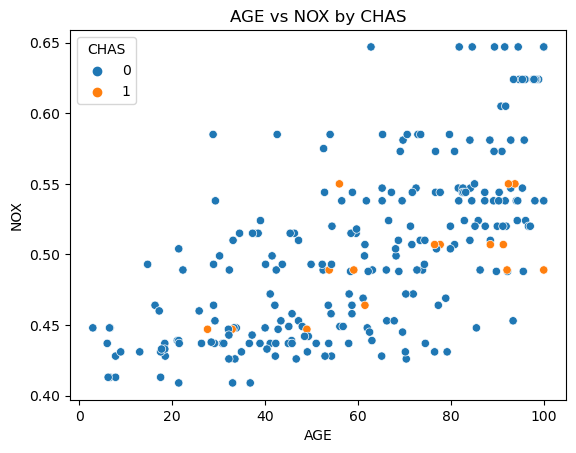

In [82]:
# Scatter plot for Age vs NOX categorized by CHAS
sns.scatterplot(data=dataset, x='AGE', y='NOX', hue='CHAS')
plt.title("AGE vs NOX by CHAS")
plt.show()

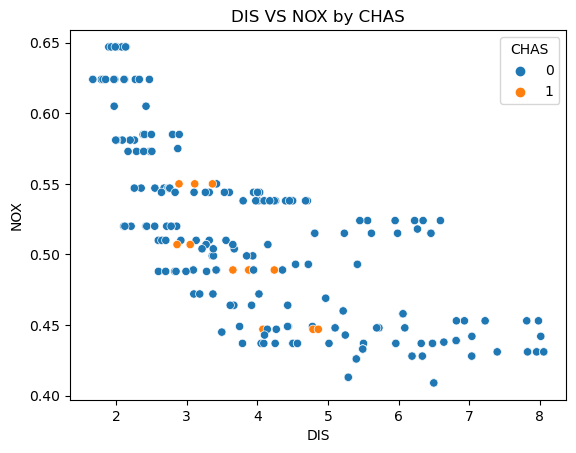

In [81]:
# Scatter plot for DIS VS NOX categorized by CHAS
sns.scatterplot(data=dataset, x='DIS', y='NOX', hue='CHAS')
plt.title("DIS VS NOX by CHAS")
plt.show()

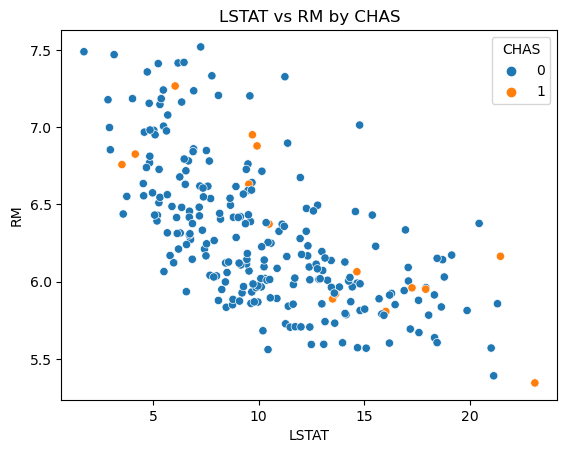

In [83]:
# Scatter plot for LSTAT vs RM categorized by CHAS
sns.scatterplot(data=dataset, x='LSTAT', y='RM', hue='CHAS')
plt.title("LSTAT vs RM by CHAS")
plt.show()

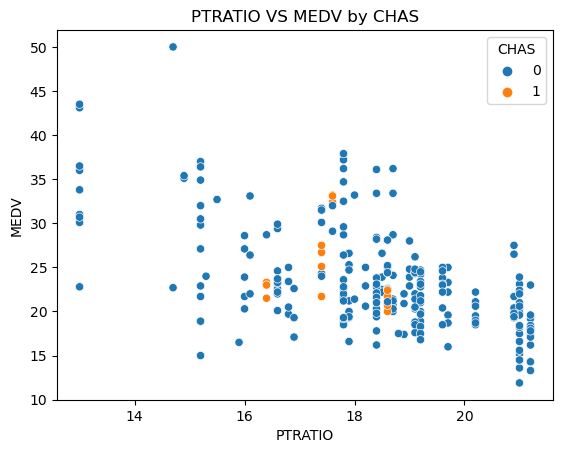

In [84]:
# Scatter plot for PTRATIO VS MEDV categorized by CHAS
sns.scatterplot(data=dataset, x='PTRATIO', y='MEDV', hue='CHAS')
plt.title("PTRATIO VS MEDV by CHAS")
plt.show()

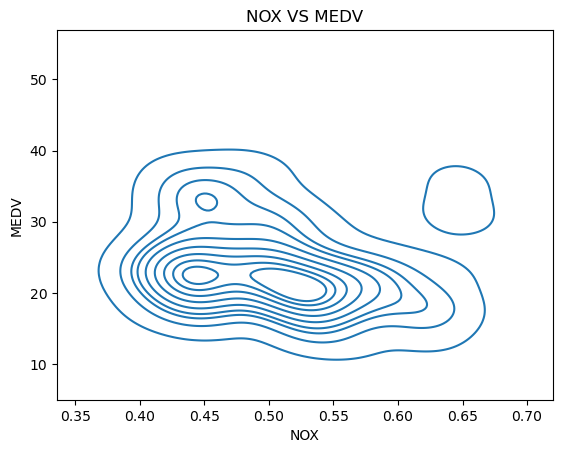

In [99]:
# KDE plot for NOX VS MEDV categorized by CHAS
sns.kdeplot(data=dataset, x='NOX', y='MEDV')
plt.title("NOX VS MEDV")
plt.show()

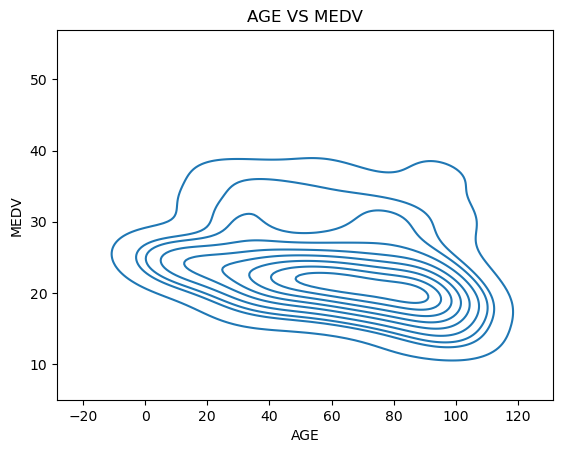

In [114]:
# KDE plot for AGE VS MEDV
sns.kdeplot(data=dataset, x='AGE', y='MEDV')
plt.title("AGE VS MEDV")
plt.show()

How does the categorical variable CHAS affects MEDV?

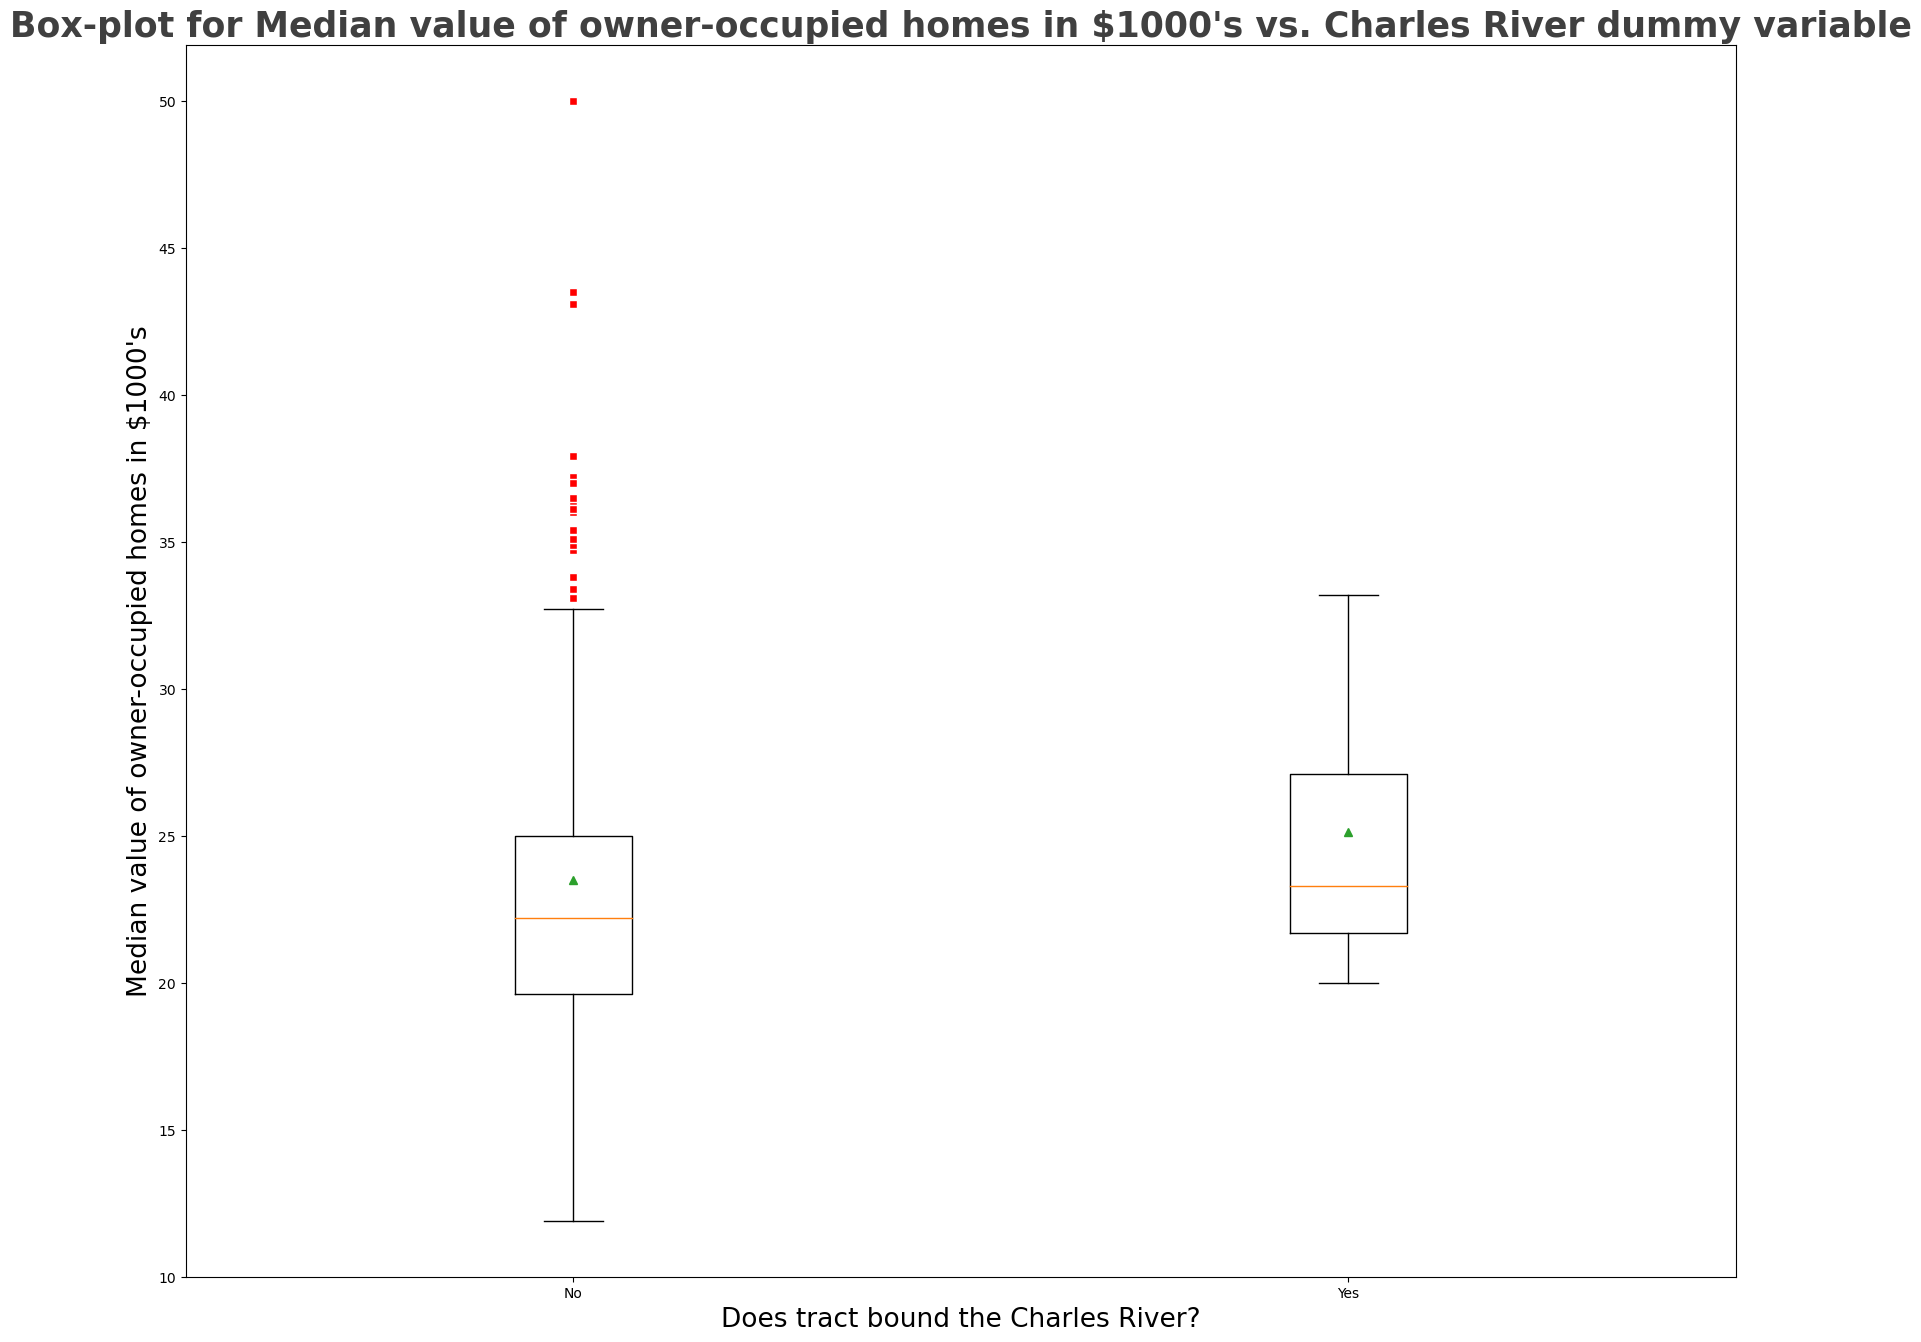

In [24]:
# Box plot for MEDV against CHAS dummy variable
fig, ax = plt.subplots(figsize = (20,16))

#Creating a list which holds MEDV grouped by CHAS
CHAS_Price = [dataset[dataset.CHAS == 0].MEDV,
              dataset[dataset.CHAS == 1].MEDV]

#Plotting 2 side by side vertical boxplots for each category of CHAS 
bp = ax.boxplot(CHAS_Price, showmeans=True, 
                flierprops=dict(markerfacecolor='r', marker='s', markeredgecolor='white'),
                vert=True)
# Setting title
ax.set_title("Box-plot for Median value of owner-occupied homes in $1000's vs. Charles River dummy variable", color='#404040',
              size = 25,
              weight = 'bold')

# Setting the y-axis title
ax.set_ylabel("Median value of owner-occupied homes in $1000's", size=19)

# Setting the x-axis title
ax.set_xlabel("Does tract bound the Charles River?", size=19)

# Setting x-axis labels
x_values = ["No", "Yes"]

# Setting x_values variable created above as xtick values
plt.xticks(1 + np.arange(2), x_values)
plt.yticks()

# Saving the boxplots
plt.savefig("Boxplot for Median value of owner-occupied homes in $1000's vs. Charles River dummy variable.png")
plt.show()


The Q1, median and Q3 of houses situated close to the Charles river are all higher than the houses which are not in close proximity. Even the lower and upper fences of prices are higher when the house is situated close to the river. The biggest discrepancy is the lower fence; where prices start at roughly 12,000USD for homes far away from the river while prices start at roughly 20,000USD for those which are close to the river. Apart from that the average prices are higher for houses close to the river. Hence, being close to the river is considered a luxury in the Boston market  

Distribution of MEDV

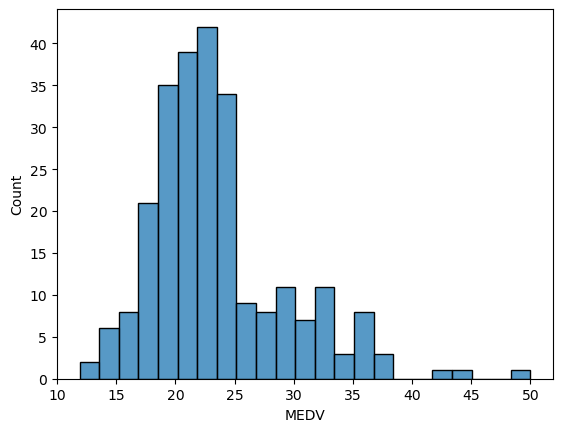

In [93]:
# plotting a histogram for MEDV
sns.histplot(data = dataset, x='MEDV')
plt.show()

# LINEAR REGRESSION

Importing the required packages

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import explained_variance_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

### Feature Selection

Initializing and selecting features which will be used to predict the dependent variable MEDV

In [26]:
# Obtaining the columns of the dataset
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [27]:
# Separating the features and the target varible
features = dataset.drop(['MEDV'], axis=1)
target = dataset['MEDV']

print(features.head())
print(target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [28]:
# Defining the SelectKBest function to select the 10 best regression features
select = SelectKBest(score_func=f_regression, k=10)

# fitting to data
select_fitted = select.fit(features, target)

# transforming
features_new = select_fitted.transform(features)

# shape of fitted and transformed object
features_new.shape


(250, 10)

In [29]:
# Checking the k-scores of the columns
select_fitted.scores_

array([  0.86235983,  39.63773012,  37.79790717,   1.10056021,
         4.29487043, 406.86107711,  14.76708118,   0.44992903,
         2.15779013,  20.66636478, 118.35715562,   0.44186714,
       174.27775802])

In [30]:
# Finding which 10 best features were kept
# Making a dataframe with truth values for each feature
features_kept_bools = pd.DataFrame({'Columns': features.columns,
                                    'Kept': select_fitted.get_support()})
features_kept_bools

,Columns,Kept
0,CRIM,False
1,ZN,True
2,INDUS,True
3,CHAS,True
4,NOX,True
5,RM,True
6,AGE,True
7,DIS,False
8,RAD,True
9,TAX,True


In [31]:
# Making a dataframe which only contains the 10 best features from feature selection
features_selected_df = features.iloc[:,select_fitted.get_support()]
features_selected_df

,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,18.0,2.31,0,0.538,6.575,65.2,1,296.0,15.3,4.98
1,0.0,7.07,0,0.469,6.421,78.9,2,242.0,17.8,9.14
2,0.0,7.07,0,0.469,7.185,61.1,2,242.0,17.8,4.03
3,0.0,2.18,0,0.458,6.998,45.8,3,222.0,18.7,2.94
4,0.0,2.18,0,0.458,7.147,54.2,3,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...
245,0.0,11.93,0,0.573,6.593,69.1,1,273.0,21.0,9.67
246,0.0,11.93,0,0.573,6.120,76.7,1,273.0,21.0,9.08
247,0.0,11.93,0,0.573,6.976,91.0,1,273.0,21.0,5.64
248,0.0,11.93,0,0.573,6.794,89.3,1,273.0,21.0,6.48


In [32]:
#Creating a list with the 10 best features
features_selected = list(features_selected_df.columns)
features_selected

['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

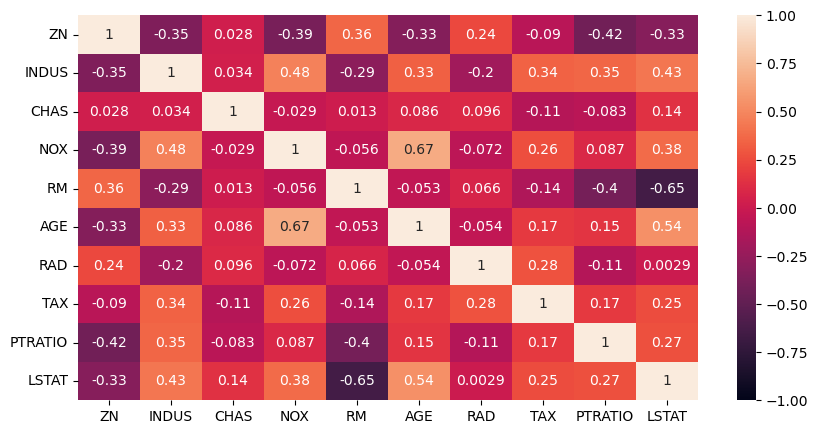

In [33]:
#Creating a correlation matrix for selected features to check for multicolinearity
f, ax = plt.subplots(figsize=(10, 5))

correlation_matrix_1 = dataset[features_selected].corr('pearson')
sns.heatmap(correlation_matrix_1, annot=True, vmin=-1, vmax=1)

plt.show()

It can be seen that the highest correlation value is 0.67. Hence there is no severe multicolinearity.

In [35]:
# Creating a copy of the dataset so that it only contains the above features
dataset_X = dataset[features_selected].copy()
dataset_X

,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,18.0,2.31,0,0.538,6.575,65.2,1,296.0,15.3,4.98
1,0.0,7.07,0,0.469,6.421,78.9,2,242.0,17.8,9.14
2,0.0,7.07,0,0.469,7.185,61.1,2,242.0,17.8,4.03
3,0.0,2.18,0,0.458,6.998,45.8,3,222.0,18.7,2.94
4,0.0,2.18,0,0.458,7.147,54.2,3,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...
245,0.0,11.93,0,0.573,6.593,69.1,1,273.0,21.0,9.67
246,0.0,11.93,0,0.573,6.120,76.7,1,273.0,21.0,9.08
247,0.0,11.93,0,0.573,6.976,91.0,1,273.0,21.0,5.64
248,0.0,11.93,0,0.573,6.794,89.3,1,273.0,21.0,6.48


In [36]:
# Creating a variable holding the target variable values
dataset_Y = dataset["MEDV"].copy()
dataset_Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
245    22.4
246    20.6
247    23.9
248    22.0
249    11.9
Name: MEDV, Length: 250, dtype: float64

Creating the training and testing datasets 

In [37]:
# Splitting and forming training and test datasets with a train-test-split of 0.75 and ensuring reproducibility
X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_Y, test_size=0.25, random_state=1)

### Building the model

Building the linear regression model

In [38]:
# Making the linear regression object
model_lr = LinearRegression()

# Training the model using train dataset
model_lr.fit(X_train, y_train)

# Predicting MEDV values using test dataset
y_prediction_test_lr = model_lr.predict(X_test)

Evaluating the model

In [39]:
# Accessing parameter coefficients
m= model_lr.coef_
m

array([-5.05292029e-03,  9.68438832e-03,  1.27057822e+00,  9.75227124e+00,
        6.41842862e+00, -2.66682661e-02,  1.46882195e-01, -1.15809445e-02,
       -7.65392000e-01, -2.66992479e-01])

In [40]:
# Accessing intercept of the model
c = model_lr.intercept_
c

-0.45731516471423816

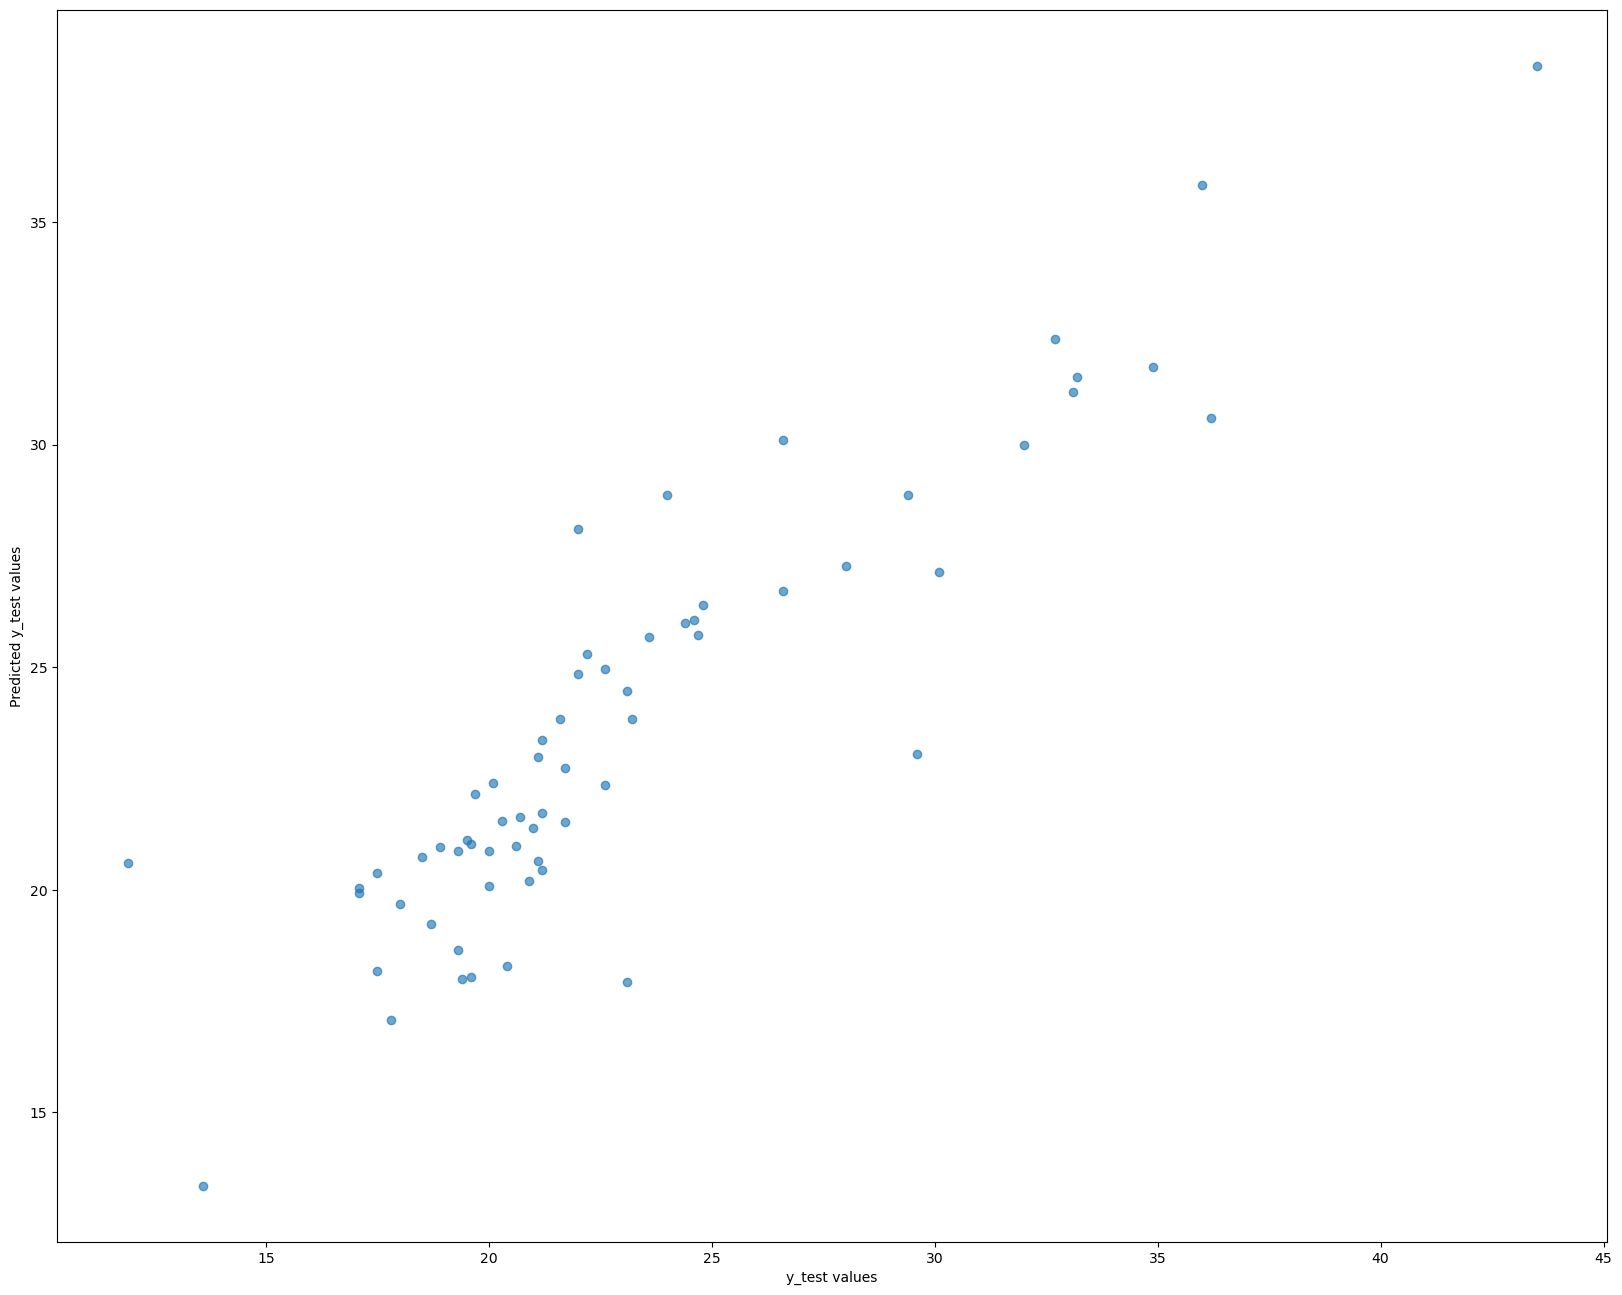

In [41]:
# Plotting MEDV test values from the testing dataset versus the predicted MEDV from the model
fig, ax = plt.subplots(figsize = (20,16))
plt.scatter(y_test, y_prediction_test_lr, alpha =0.65)
plt.xlabel("y_test values")
plt.ylabel("Predicted y_test values")
plt.show()

In [42]:
# Printing model performance metrics
print("Variance score: {}".format(explained_variance_score(y_test, y_prediction_test_lr)))#~1 is better
print("R-squared value: {}".format(r2_score(y_test, y_prediction_test_lr)))
print("Mean Squared Error: {}".format(metrics.mean_squared_error(y_test, y_prediction_test_lr)))#lower the better
print("Root Mean squared error: {}".format(mean_squared_error(y_test, y_prediction_test_lr, squared = False))) #lower the better
print("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_prediction_test_lr))) #lower the better

Variance score: 0.8048327079214048
R-squared value: 0.7964692275393019
Mean Squared Error: 6.7981965079846685
Root Mean squared error: 2.607335135341191
Mean Absolute Error: 1.9521425624456221


# DECISION TREE REGRESSOR

In [127]:
# Importing required packages
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn import tree

### Building the model

Building a decision tree classifier model

In [46]:
# Making the decision tree classifier object
model_dt = DecisionTreeRegressor(random_state=10)

# Training the model using train dataset
model_dt.fit(X_train, y_train)

# Predicting MEDV values using test dataset
y_prediction_test_dt = model_dt.predict(X_test)

In [128]:
tree.plot_tree(model_dt)

[Text(0.6392225049318508, 0.9722222222222222, 'X[4] <= 6.723\nsquared_error = 33.279\nsamples = 187\nvalue = 23.752'),
 Text(0.32489407729555236, 0.9166666666666666, 'X[9] <= 9.715\nsquared_error = 13.446\nsamples = 151\nvalue = 21.751'),
 Text(0.0895355093256815, 0.8611111111111112, 'X[7] <= 222.5\nsquared_error = 11.051\nsamples = 62\nvalue = 24.224'),
 Text(0.04124820659971305, 0.8055555555555556, 'X[5] <= 60.45\nsquared_error = 10.133\nsamples = 4\nvalue = 31.45'),
 Text(0.02977044476327116, 0.75, 'X[6] <= 5.0\nsquared_error = 0.023\nsamples = 2\nvalue = 28.55'),
 Text(0.024031563845050216, 0.6944444444444444, 'squared_error = 0.0\nsamples = 1\nvalue = 28.7'),
 Text(0.03550932568149211, 0.6944444444444444, 'squared_error = 0.0\nsamples = 1\nvalue = 28.4'),
 Text(0.05272596843615495, 0.75, 'X[4] <= 6.354\nsquared_error = 3.423\nsamples = 2\nvalue = 34.35'),
 Text(0.046987087517934005, 0.6944444444444444, 'squared_error = 0.0\nsamples = 1\nvalue = 36.2'),
 Text(0.058464849354375896, 

Evaluating the model

In [48]:
# Checking model performance metrics 
print("Variance score: {}".format(explained_variance_score(y_test, y_prediction_test_dt)))#~1 is better
print("R-squared value: {}".format(r2_score(y_test, y_prediction_test_dt)))
print("Mean Squared Error: {}".format(metrics.mean_squared_error(y_test, y_prediction_test_dt)))#lower the better
print("Root Mean squared error: {}".format(mean_squared_error(y_test, y_prediction_test_dt, squared = False)))#lower the better
print("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_prediction_test_dt))) #lower the better

Variance score: 0.6995464428409961
R-squared value: 0.6983866013566886
Mean Squared Error: 10.074285714285715
Root Mean squared error: 3.1740015302903863
Mean Absolute Error: 2.4317460317460324


### Grid Search

Tuning the hyperparameters using GridSearchCV

In [64]:
# Doing a Grid Search Cross Validation on the Decision tree regressor
# Setting the grid search parameters
param_grid = {"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "splitter" : [ "best", "random"],
              "min_samples_split": [5,6,7,8,9, 10, 11, 12, 13, 14, 15],
              "max_depth": [2, 3, 4, 5, 6, 7, 8],
              "min_samples_leaf": [2,3,4,5,6,7,8,9],
              "max_leaf_nodes": [5, 20, 100, None]
              }

# We use n_jobs=-2 to parallelize tasks and reduce computation time
grid_dt = GridSearchCV(model_dt, param_grid=param_grid, n_jobs=-2)

# Fitting the tuned model using the X and y training datasets
grid_dt.fit(X_train, y_train)

# Predicting MEDV values using test dataset
y_prediction_test_dt_grid = grid_dt.predict(X_test)

# Printing best hyperparameters and score
print('Best hyperparameters are: '+str(grid_dt.best_params_))
print('Best score is: '+str(grid_dt.best_score_))

Best hyperparameters are: {'criterion': 'absolute_error', 'max_depth': 6, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 11, 'splitter': 'best'}
Best score is: 0.6753956688094693


Plotting the decision tree

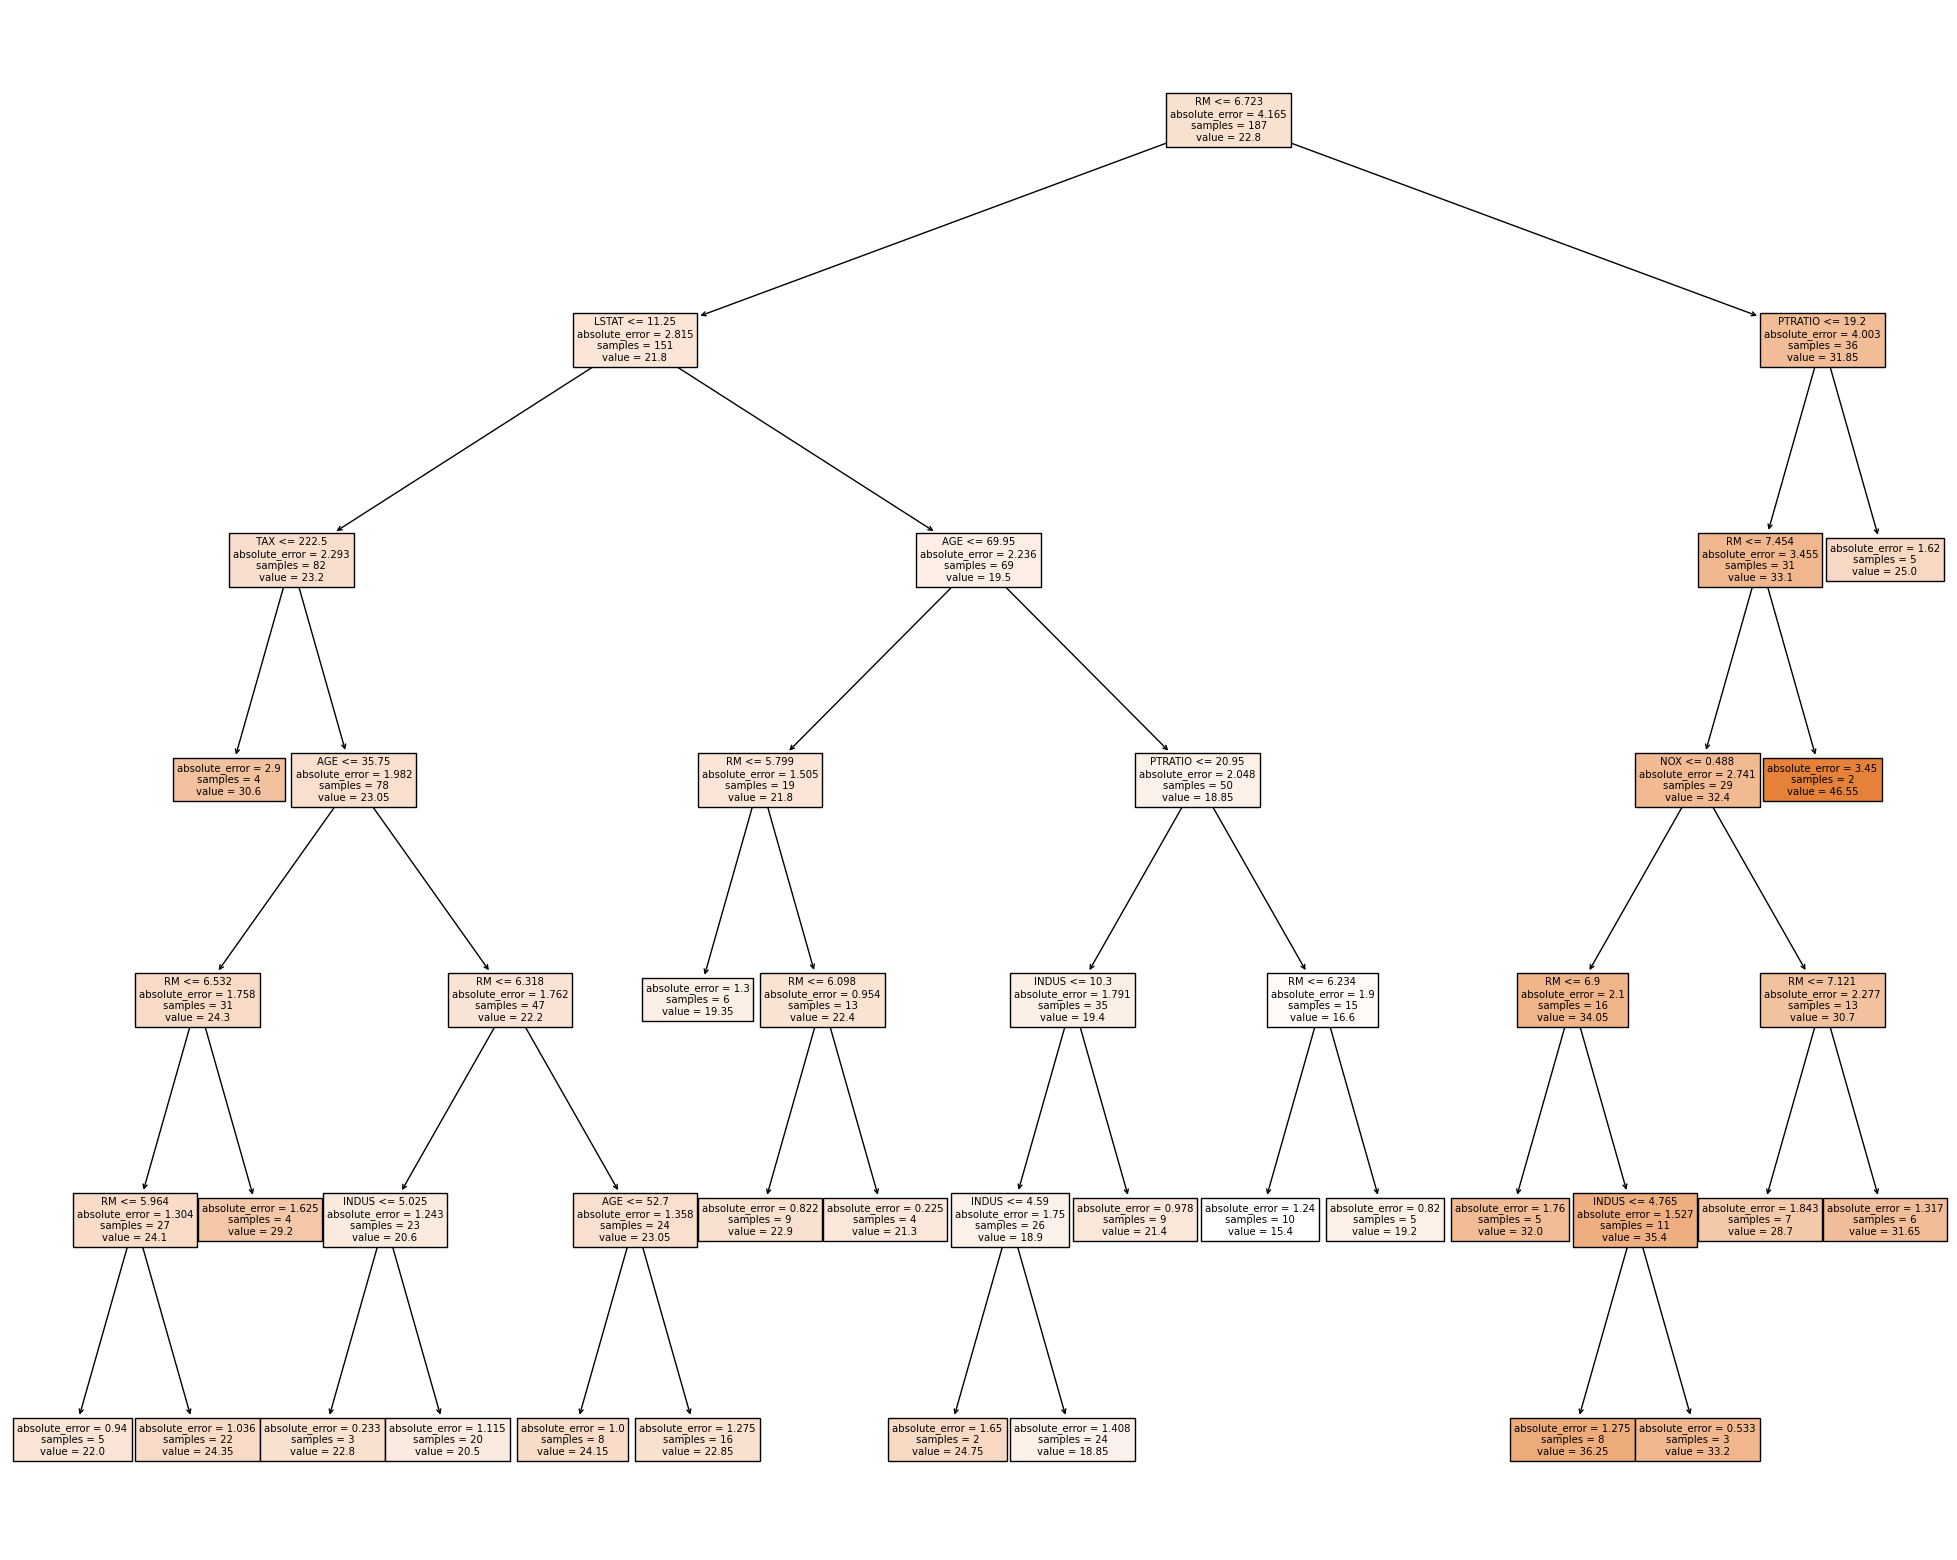

In [139]:
fig = plt.figure(figsize=(25,20))
grid_dt_tree = tree.plot_tree(grid_dt.best_estimator_, 
                   feature_names=list(dataset_X.columns),
                    
                   filled=True)
plt.show()

In [119]:
## Checking model performance metrics after hyperparameter tuning using GridSearchCV
print("Variance score: {}".format(explained_variance_score(y_test, y_prediction_test_dt_grid)))#~1 is better
print("R-squared value: {}".format(r2_score(y_test, y_prediction_test_dt_grid)))
print("Mean Squared Error: {}".format(metrics.mean_squared_error(y_test, y_prediction_test_dt_grid)))#lower the better
print("Root Mean squared error: {}".format(mean_squared_error(y_test, y_prediction_test_dt_grid, squared = False)))#lower the better
print("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_prediction_test_dt_grid))) #lower the better

Variance score: 0.7247717504976999
R-squared value: 0.7181403590741302
Mean Squared Error: 9.414484126984126
Root Mean squared error: 3.0683031347935827
Mean Absolute Error: 2.216666666666666


### Randomized Search

Tuning the hyperparameters using RandomizedSearchCV

In [65]:
# Doing a Randomized Search Cross Validation on the Decision tree regressor
# Setting the randomized search parameters
rs_space = {"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "splitter" : [ "best", "random"],
              "min_samples_split": [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40],
              "max_depth": list(np.arange(2, 100)) + [None],
              "min_samples_leaf": list(np.arange(1, 100)),
              "max_leaf_nodes": list(np.arange(2, 100)) +[None]
           }

random_dt = RandomizedSearchCV(model_dt, rs_space, n_iter=10000, scoring=None, n_jobs=-1, cv=3)

# Fitting the tuned model using the X and y training datasets
random_dt.fit(X_train, y_train)

# Predicting MEDV values using test dataset
y_prediction_test_dt_random = random_dt.predict(X_test)

# Printing best hyperparameters and score
print('Best hyperparameters are: '+str(random_dt.best_params_))
print('Best score is: '+str(random_dt.best_score_))

Best hyperparameters are: {'splitter': 'best', 'min_samples_split': 30, 'min_samples_leaf': 1, 'max_leaf_nodes': 86, 'max_depth': 36, 'criterion': 'poisson'}
Best score is: 0.6271824498312827


Plotting the decision tree

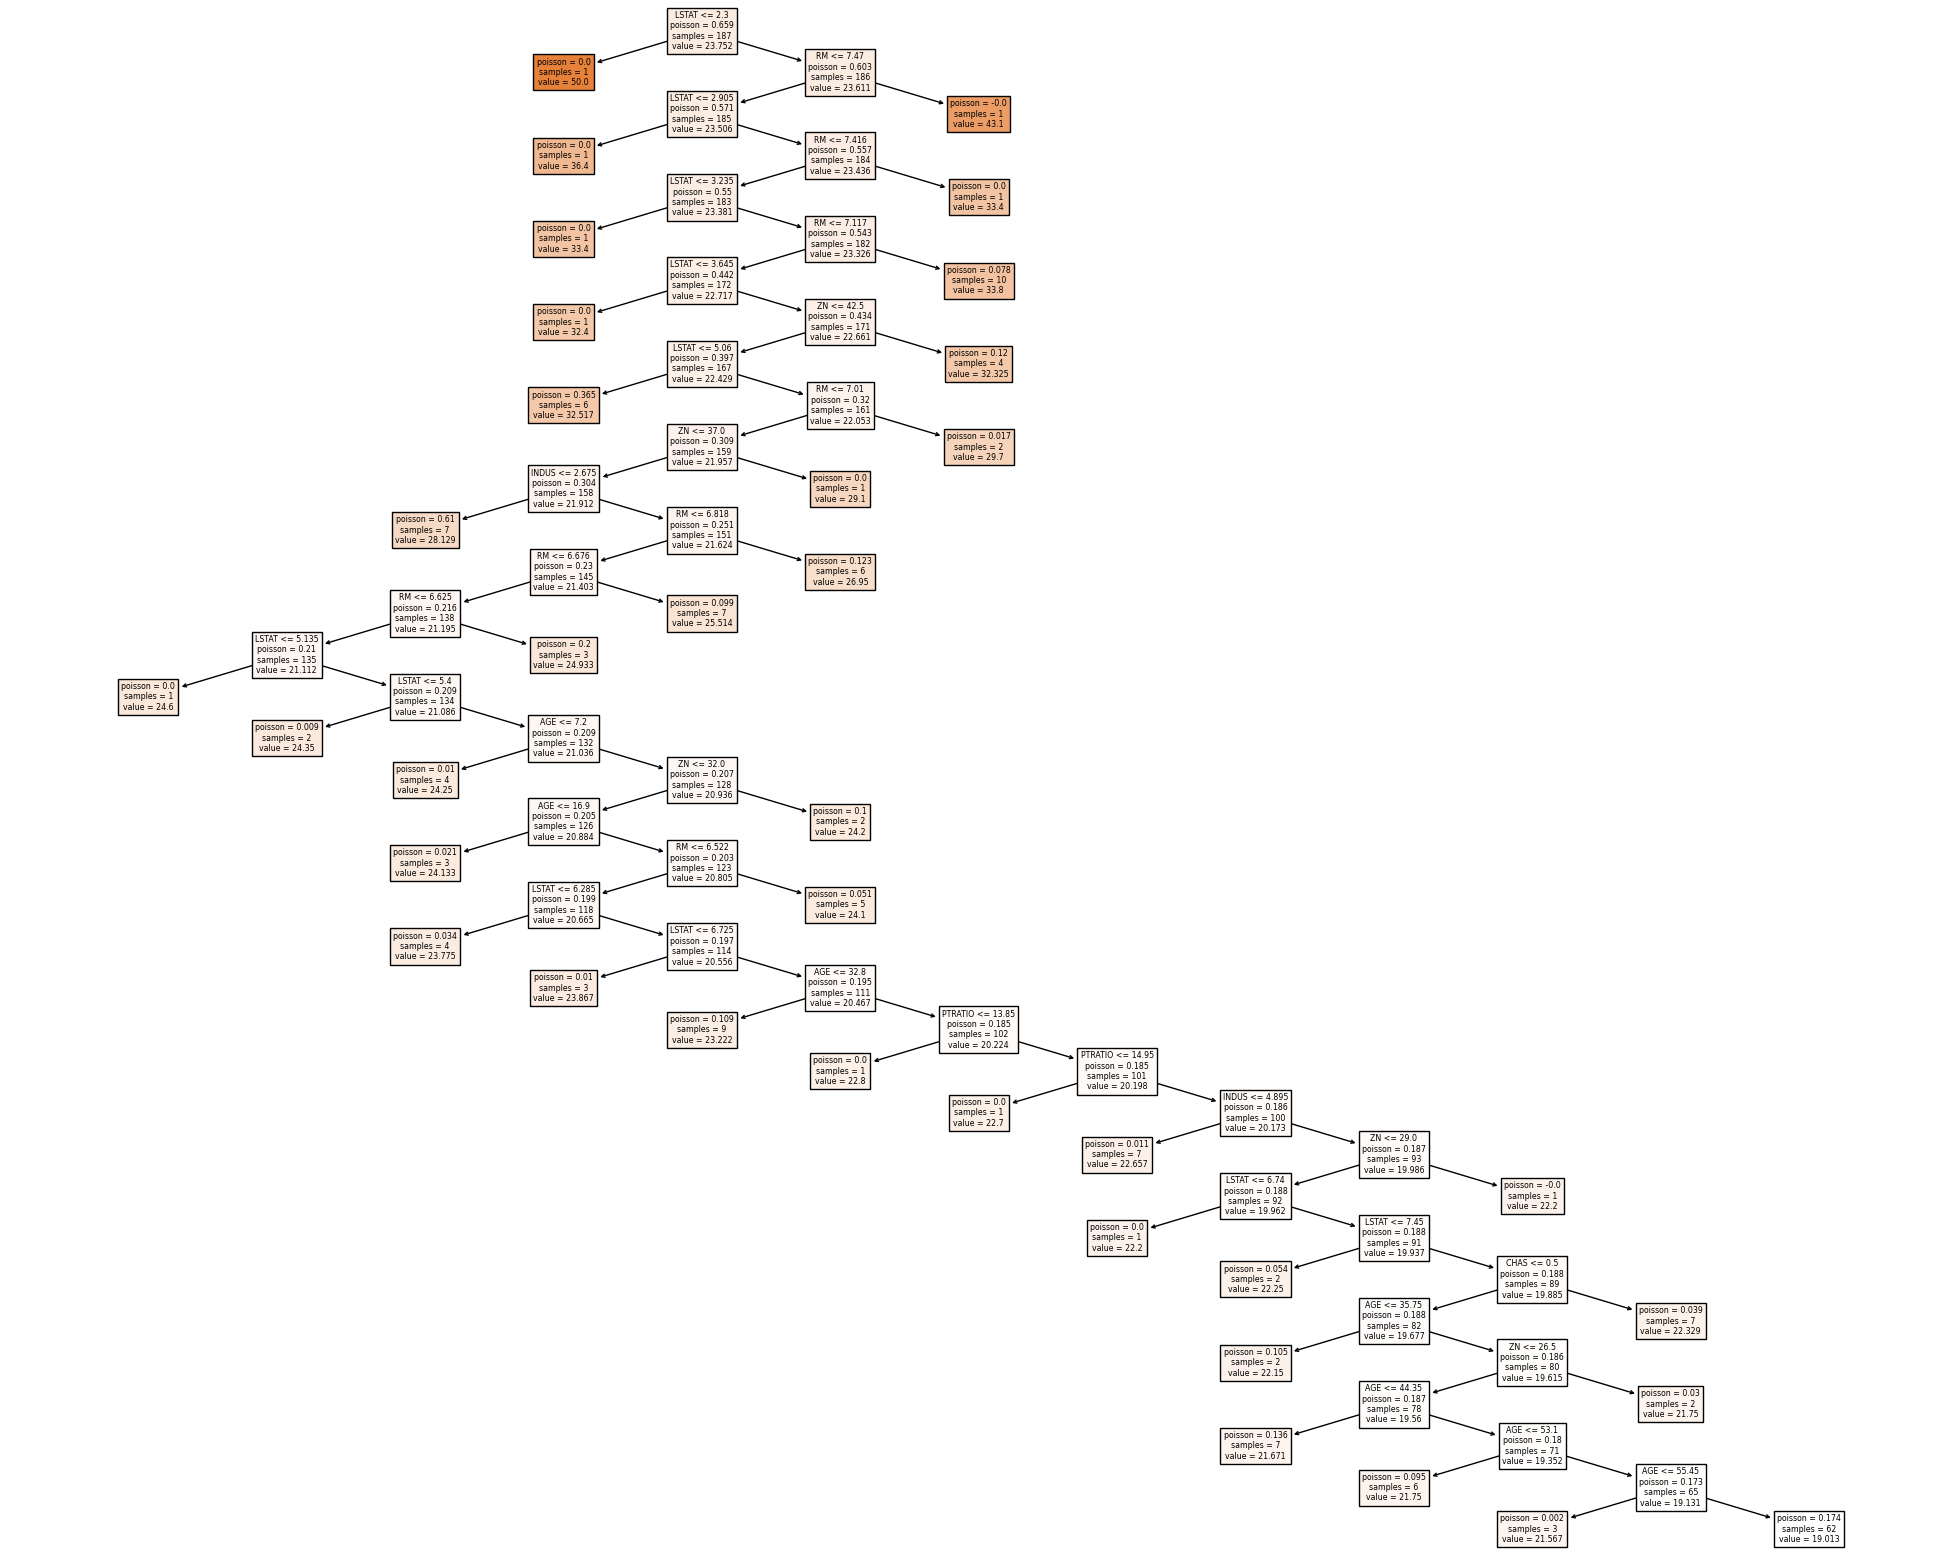

In [138]:
fig = plt.figure(figsize=(25,20))
random_dt_tree = tree.plot_tree(random_dt.best_estimator_, 
                   feature_names=list(dataset_X.columns),
                    
                   filled=True)
plt.show()

In [118]:
# Checking model performance metrics after hyperparameter tuning using RandomizedSearchCV
print("Variance score: {}".format(explained_variance_score(y_test, y_prediction_test_dt_random)))#~1 is better
print("R-squared value: {}".format(r2_score(y_test, y_prediction_test_dt_random)))
print("Mean Squared Error: {}".format(metrics.mean_squared_error(y_test, y_prediction_test_dt_random)))#lower the better
print("Root Mean squared error: {}".format(mean_squared_error(y_test, y_prediction_test_dt_random, squared = False)))#lower the better
print("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_prediction_test_dt_random))) #lower the better

Variance score: 0.717314290320044
R-squared value: 0.7101590085975938
Mean Squared Error: 9.681071770133121
Root Mean squared error: 3.1114420724373324
Mean Absolute Error: 2.119437942441014


# RANDOM FOREST REGRESSOR

In [85]:
# importing required packages
from sklearn.ensemble import RandomForestRegressor

### Building the model

Building a random forest regressor model

In [125]:
# Making the random forest regressor object
model_rfr = RandomForestRegressor(n_estimators = 100, max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state = 3)

# Training the model using train dataset
model_rfr.fit(X_train, y_train)

# Predicting MEDV values using test dataset
y_prediction_test_rfr = model_rfr.predict(X_test)

Evaluating the model

In [126]:
# Checking model performance metrics
print("Variance score: {}".format(explained_variance_score(y_test, y_prediction_test_rfr)))#~1 is better
print("R-squared value: {}".format(r2_score(y_test, y_prediction_test_rfr)))
print("Mean Squared Error: {}".format(metrics.mean_squared_error(y_test, y_prediction_test_rfr)))#lower the better
print("Root Mean squared error: {}".format(mean_squared_error(y_test, y_prediction_test_rfr, squared = False)))#lower the better
print("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_prediction_test_rfr))) #lower the better

Variance score: 0.8405409958260021
R-squared value: 0.8345881707391187
Mean Squared Error: 5.524973479269927
Root Mean squared error: 2.350526213270111
Mean Absolute Error: 1.6827251400582326


### Randomized Search

Grid search was not used here as it took too long to run

Tuning the hyperparameters using RandomizedSearchCV

In [88]:
# Doing a Randomized Search Cross Validation on the Decision tree regressor
# Setting the randomized search parameters
rs_space_rfr = {"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "bootstrap": [True, False],
              "min_samples_split": [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40],
              "max_depth": list(np.arange(2, 100)) + [None],
              "min_samples_leaf": list(np.arange(1, 100)),
              "max_leaf_nodes": list(np.arange(2, 100)) +[None]
           }

random_rfr = RandomizedSearchCV(model_rfr, rs_space_rfr, n_iter=10000, scoring=None, n_jobs=-1, cv=3)

# Fitting the tuned model using the X and y training datasets
random_rfr.fit(X_train, y_train)

# Predicting MEDV values using test dataset
y_prediction_test_rfr_random = random_rfr.predict(X_test)

# Printing best hyperparameters and score
print('Best hyperparameters are: '+str(random_rfr.best_params_))
print('Best score is: '+str(random_rfr.best_score_))

# 10 minutes to run

Best hyperparameters are: {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_leaf_nodes': 84, 'max_depth': 22, 'criterion': 'absolute_error', 'bootstrap': True}
Best score is: 0.7249175879555422


In [120]:
# Checking model performance metrics after hyperparameter tuning using RandomizedSearchCV
print("Variance score: {}".format(explained_variance_score(y_test, y_prediction_test_rfr_random)))#~1 is better
print("R-squared value: {}".format(r2_score(y_test, y_prediction_test_rfr_random)))
print("Mean Squared Error: {}".format(metrics.mean_squared_error(y_test, y_prediction_test_rfr_random)))#lower the better
print("Root Mean squared error: {}".format(mean_squared_error(y_test, y_prediction_test_rfr_random, squared = False)))#lower the better
print("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_prediction_test_rfr_random))) #lower the better

Variance score: 0.8400801622148747
R-squared value: 0.8389001234047653
Mean Squared Error: 5.38094856746032
Root Mean squared error: 2.3196871701719437
Mean Absolute Error: 1.600626984126985


# XGBoost Model

In [69]:
# importing required packages
from xgboost import XGBRegressor
import xgboost as xgb

### Building the model

In [71]:
# Making the XGBoost regressor object
model_xgb = XGBRegressor(random_state = 2)

# Training the model using train dataset
model_xgb.fit(X_train, y_train)

# Predicting MEDV values using test dataset
y_prediction_test_xgb = model_xgb.predict(X_test)

In [72]:
# Checking model performance metrics
print("Variance score: {}".format(explained_variance_score(y_test, y_prediction_test_xgb)))#~1 is better
print("R-squared value: {}".format(r2_score(y_test, y_prediction_test_xgb)))
print("Mean Squared Error: {}".format(metrics.mean_squared_error(y_test, y_prediction_test_xgb)))#lower the better
print("Root Mean squared error: {}".format(mean_squared_error(y_test, y_prediction_test_xgb, squared = False)))#lower the better
print("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_prediction_test_xgb))) #lower the better

Variance score: 0.8419557613058697
R-squared value: 0.841951118801939
Mean Squared Error: 5.279041293173584
Root Mean squared error: 2.2976164373484065
Mean Absolute Error: 1.7857972160218258


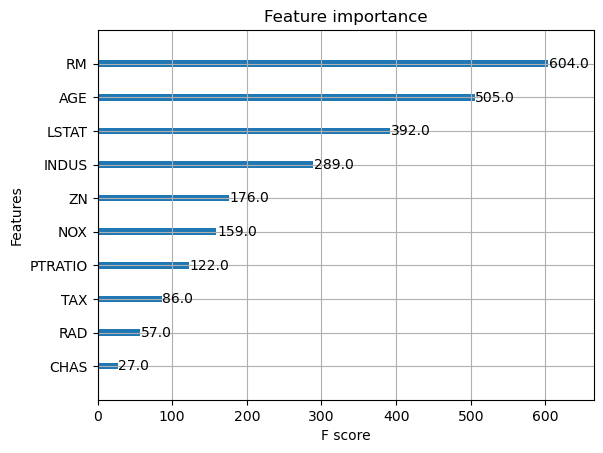

In [73]:
# Plotting importance of features
xgb.plot_importance(model_xgb, plt.gca())
plt.show()

### Grid Search

Tuning the hyperparameters using GridSearchCV

In [75]:
# Doing a Grid Search Cross Validation on the  XGBregressor
# Setting the grid search parameters
param_grid_xgb = {"booster": ["gbtree", "gblinear", "dart"],
              "eta": [0.1, 0.3, 0.7, 1],
              "subsample": [0, 0.25, 0.5, 0.75, 1],
              "max_depth": [2, 4, 6, 8, 100]
              }

# We use n_jobs=-1 to parallelize tasks and reduce computation time
grid_xgb = GridSearchCV(model_xgb, param_grid=param_grid_xgb, n_jobs=5)

# Fitting the tuned model using the X and y training datasets
grid_xgb.fit(X_train, y_train)

# Predicting MEDV values using test dataset
y_prediction_test_xgb_grid = grid_xgb.predict(X_test)

# Printing best hyperparameters and score
print('Best hyperparameters are: '+str(grid_xgb.best_params_))
print('Best score is: '+str(grid_xgb.best_score_))

Best hyperparameters are: {'booster': 'dart', 'eta': 0.1, 'max_depth': 100, 'subsample': 0.25}
Best score is: 0.7650713986021609


In [122]:
# Checking model performance metrics after hyperparameter tuning using GridSearchCV
print("Variance score: {}".format(explained_variance_score(y_test, y_prediction_test_xgb_grid)))#~1 is better
print("R-squared value: {}".format(r2_score(y_test, y_prediction_test_xgb_grid)))
print("Mean Squared Error: {}".format(metrics.mean_squared_error(y_test, y_prediction_test_xgb_grid)))#lower the better
print("Root Mean squared error: {}".format(mean_squared_error(y_test, y_prediction_test_xgb_grid, squared = False)))#lower the better
print("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_prediction_test_xgb_grid))) #lower the better

Variance score: 0.862336599211138
R-squared value: 0.8599186122316314
Mean Squared Error: 4.678903291365729
Root Mean squared error: 2.163077273553982
Mean Absolute Error: 1.6368435178484237


### Randomized Search

Tuning the hyperparameters using RandomizedSearchCV

In [77]:
# Doing a Randomized Search Cross Validation on the Decision tree regressor
# Setting the randomized search parameters
rs_space_xgb = {"booster": ["gbtree", "gblinear", "dart"],
              "eta": list(np.arange(0, 1, 0.1)),
              "subsample": list(np.arange(0, 1, 0.1)),
              "max_depth": list(np.arange(2, 100))
              }

random_xgb = RandomizedSearchCV(model_xgb, rs_space_xgb, n_iter=10000, scoring=None, n_jobs=-1, cv=3)

# Fitting the tuned model using the X and y training datasets
random_xgb.fit(X_train, y_train)

# Predicting MEDV values using test dataset
y_prediction_test_xgb_random = random_xgb.predict(X_test)

# Printing best hyperparameters and score
print('Best hyperparameters are: '+str(random_xgb.best_params_))
print('Best score is: '+str(random_xgb.best_score_))

# 10 minutes to run

Best hyperparameters are: {'subsample': 0.30000000000000004, 'max_depth': 11, 'eta': 0.1, 'booster': 'gbtree'}
Best score is: 0.781565349636546


In [78]:
# Printing best hyperparameters and score
print('Best hyperparameters are: '+str(random_xgb.best_params_))
print('Best score is: '+str(random_xgb.best_score_))

Best hyperparameters are: {'subsample': 0.30000000000000004, 'max_depth': 11, 'eta': 0.1, 'booster': 'gbtree'}
Best score is: 0.781565349636546


In [123]:
# Checking model performance metrics after hyperparameter tuning using RandomizedSearchCV
print("Variance score: {}".format(explained_variance_score(y_test, y_prediction_test_xgb_random)))#~1 is better
print("R-squared value: {}".format(r2_score(y_test, y_prediction_test_xgb_random)))
print("Mean Squared Error: {}".format(metrics.mean_squared_error(y_test, y_prediction_test_xgb_random)))#lower the better
print("Root Mean squared error: {}".format(mean_squared_error(y_test, y_prediction_test_xgb_random, squared = False)))#lower the better
print("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_prediction_test_xgb_random))) #lower the better

Variance score: 0.8692506902276153
R-squared value: 0.8658330087949774
Mean Squared Error: 4.481354637775575
Root Mean squared error: 2.116921027760737
Mean Absolute Error: 1.5361673900059294
